<a href="https://colab.research.google.com/github/BHATT-APOORVA/minorMLprojects/blob/main/Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

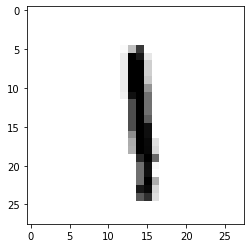

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

dig = X[8]
dig_img = dig.reshape(28,28)
plt.imshow(dig_img, cmap = mpl.cm.binary)

In [ ]:
import numpy as np
#converting y to int
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
?KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(weights = 'distance', n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(y_test, y_pred)

0.9714

In [ ]:
con_mat= confusion_matrix(y_test, y_pred)

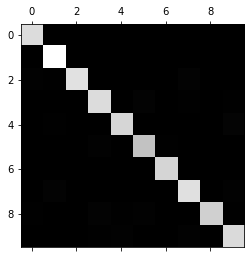

In [ ]:
plt.matshow(con_mat, cmap = mpl.cm.gray)

plt.show()

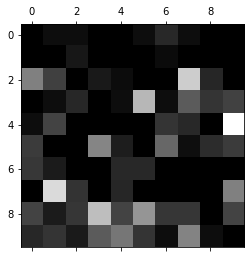

In [ ]:
#diagonal entries are true, so not concerned with them
# 9 and 8 gets misclassified a the most, 4 gets misclassified as 9
#dividing number by sum of rows to normalize 
row_sums = con_mat.sum(axis = 1,keepdims=True)
normal_con_mat = con_mat/row_sums
np.fill_diagonal(normal_con_mat,0)
plt.matshow(normal_con_mat, cmap = mpl.cm.gray)
plt.show()

In [ ]:
# lets try to do Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights' : ['uniform', 'distance'], 'n_neighbors' : [3, 4, 5]}]

knn2 = KNeighborsClassifier()
grid_search = GridSearchCV(knn2, param_grid, cv =5, verbose = 3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  36.6s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  46.6s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  48.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  38.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  38.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.2s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  35.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  36.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  35.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  39.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
grid_search.best_params_ 

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
# the hyperparams we already used 
grid_search.best_score_

0.9716166666666666

## Trying data augumentation

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_img(image, dx, dy):
  img = image.reshape((28,28))
  shift_img = shift(img, [dy, dx], cval= 0, mode = 'constant')
  return shift_img.reshape([-1])

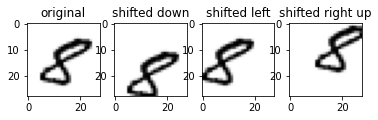

In [ ]:
plt.subplot(241)
plt.title("original")
plt.imshow(X[1776].reshape(28,28), cmap = "Greys")

plt.subplot(242)
plt.title("shifted down")
plt.imshow(shift_img(X[1776], 0, 5).reshape(28,28), cmap = "Greys")

plt.subplot(243)
plt.title("shifted left")
plt.imshow(shift_img(X[1776], -5, 0).reshape(28,28), cmap = "Greys")

plt.subplot(244)
plt.title("shifted right up")
plt.imshow(shift_img(X[1776], 5, -5).reshape(28,28), cmap = "Greys")

plt.show()

In [ ]:
x_aug = [img for img in X_train]
y_aug = [img for img in y_train]

In [ ]:
for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
  for img, label in zip(X_train, y_train):
    x_aug.append(shift_img(img, dx, dy))
    y_aug.append(label)

x_aug = np.array(x_aug)
y_aug = np.array(y_aug)
shuffle_ind = np.random.permutation(len(x_aug))
x_aug = x_aug[shuffle_ind]
y_aug = y_aug[shuffle_ind]

In [ ]:
knn3 = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn3.fit(x_aug,y_aug)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_pred3 = knn3.predict(X_test)
accuracy_score(y_test, y_pred3)

0.9763

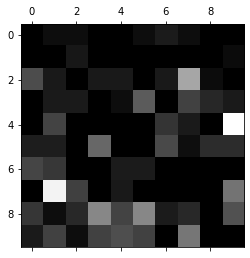

In [ ]:
con_mat2= confusion_matrix(y_test, y_pred3)
row_sums = con_mat2.sum(axis = 1,keepdims=True)
normal_con_mat2 = con_mat2/row_sums
np.fill_diagonal(normal_con_mat2,0)
plt.matshow(normal_con_mat2, cmap = mpl.cm.gray)
plt.show()